# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [75]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

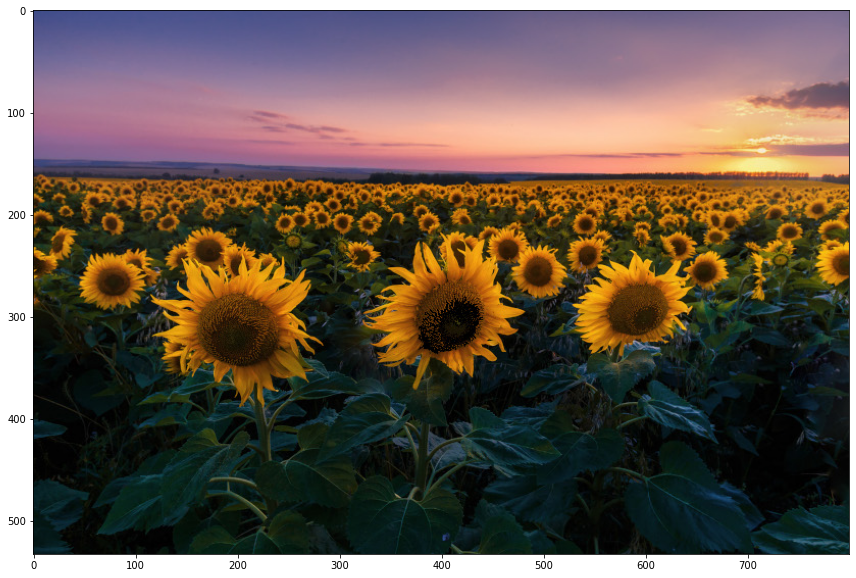

In [76]:
img = cv2.imread('./data/img.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

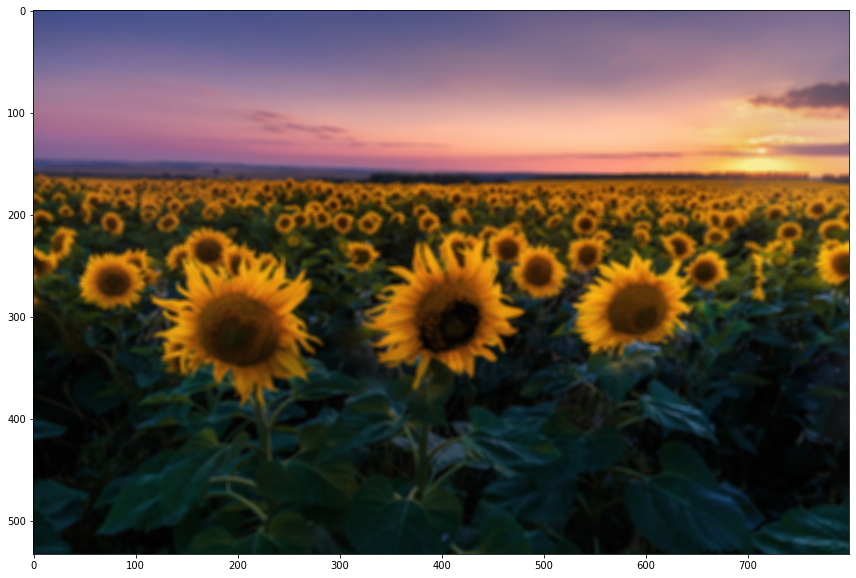

In [77]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, ksize=(5,5), sigmaX=5)
plt.imshow(unsharp)

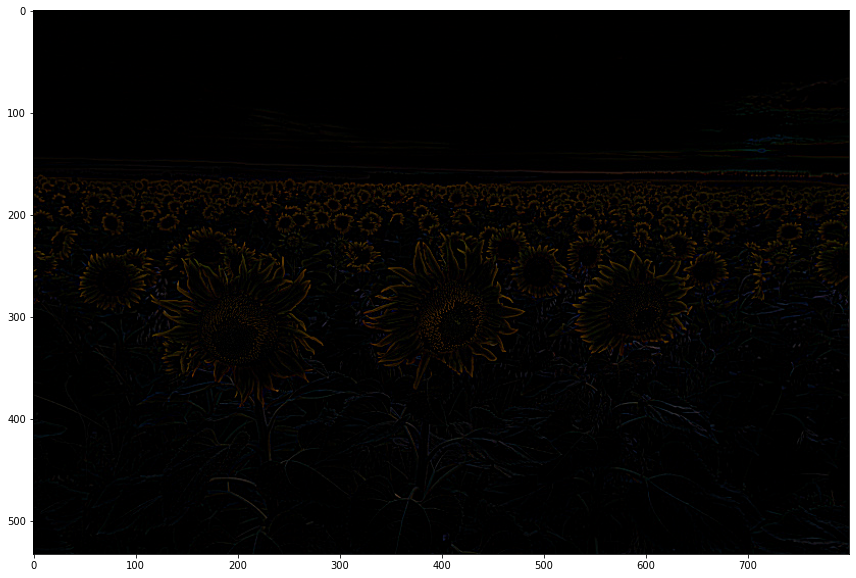

In [78]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
def difference(img1, img2):
    return img1.astype(np.float32) - img2.astype(np.float32)
    
plt.imshow(difference(img, unsharp).clip(0, 255).astype(np.uint8))

In [79]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
def usp_filter(img, amount, sigma=5, kernel=5):
    unsharp = cv2.GaussianBlur(img, ksize=(kernel,kernel), sigmaX=sigma)
    diff = difference(img, unsharp)
    sharpened = img.astype(np.float32) + diff * amount
    return sharpened.clip(0, 255).astype(np.uint8)

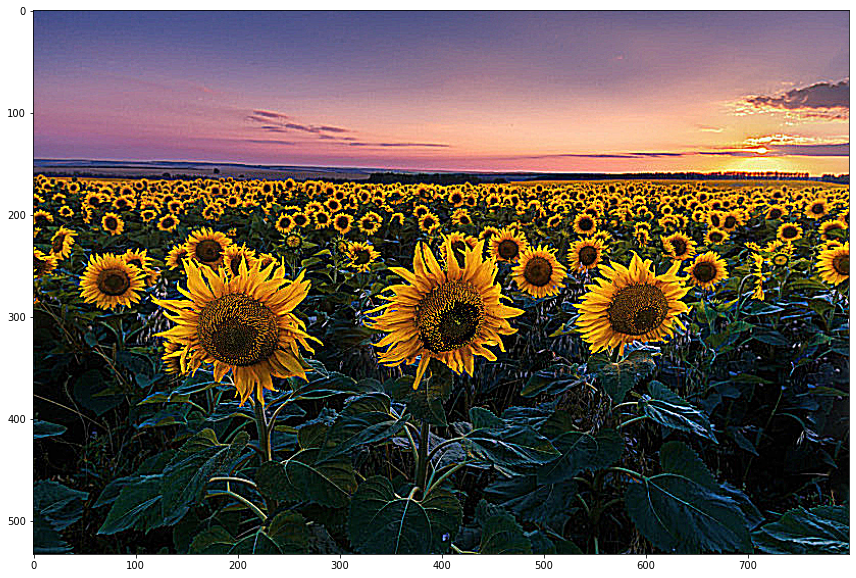

In [80]:
plt.imshow(usp_filter(img, 5.0))

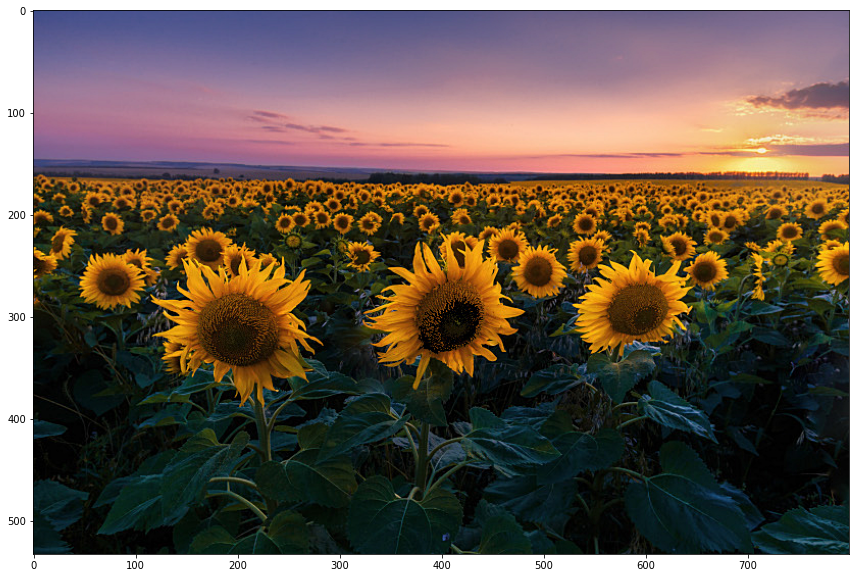

In [81]:
plt.imshow(usp_filter(img, 0.5))

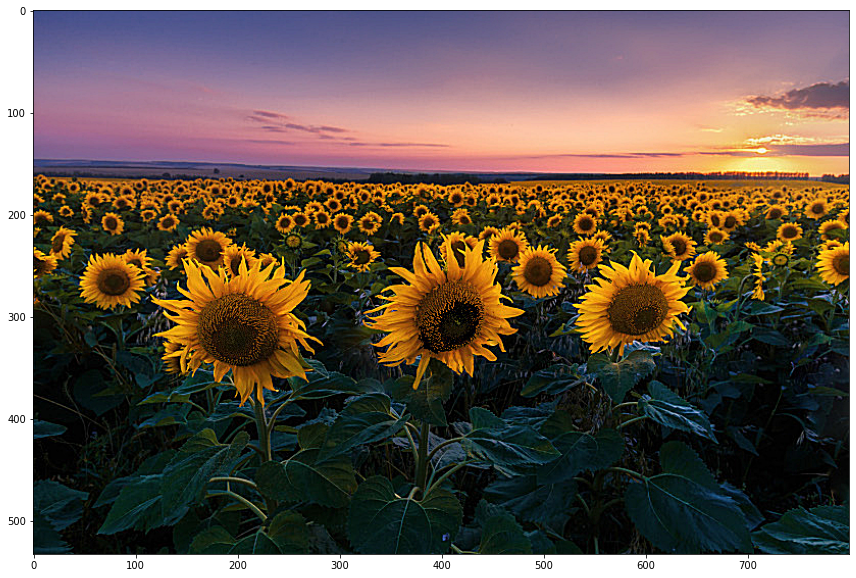

In [82]:
plt.imshow(usp_filter(img, 1.5))

### Questions
* What is a good (reasonable) value for the `amount` parameter?
 * What happens if it is too small?
 * What happens if it is too large?

In my opinion, for this image size, values around 1.5 looks pretty good. The small amount gives almost nothing and too large one gives too sharpened and unnatural looking.